## Paso 2. Preprocesamiento de datos

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_inline as mpl
mpl.backend = "svg"
import os
import sys

Dado que en la etapa de EDA se identificaron problemas de outliers y que al quitarlos habria pérdida de datos, por ejemplo, holiday ya no se ve el valor 1, en la variable weathersit también ya no se ve data con el número 4.

Lo encontrado tambien en EDA:

- Invalid entries found in column 'yr':
- Invalid entries found in column 'mnth':
- Invalid entries found in column 'holiday':
- Invalid entries found in column 'weekday':
- Invalid entries found in column 'workingday':
- Invalid entries found in column 'weathersit':
- Invalid entries found in column 'season':

Tendremos una estrategia para restablecer los valores de las variables dependientes de la fecha o que puedan ser calculadas a partir de ella.

In [2]:
# Cargamos dataset limpio
df_mod_clean = pd.read_csv('../data/clean/bike_sharing_cleaned.csv')

In [3]:
# Revisamos el shape y los primeros registros
print(df_mod_clean.shape)
df_mod_clean.head(10)

(17726, 17)


,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant
0,2011-01-01,1.0,0.0,1.0,0.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,0
1,2011-01-01,1.0,0.0,1.0,1.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1
2,2011-01-01,1.0,0.0,1.0,2.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,2
3,2011-01-01,1.0,0.0,1.0,3.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,3
4,2011-01-01,1.0,0.0,1.0,4.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,4
5,2011-01-01,1.0,0.0,1.0,5.0,0.0,6.0,0.0,2.0,0.24,0.2576,0.75,0.0896,0.0,1.0,1.0,5
6,2011-01-01,1.0,0.0,1.0,6.0,0.0,6.0,0.0,1.0,0.22,0.2727,0.80,0.0000,2.0,0.0,2.0,6
7,2011-01-01,1.0,0.0,1.0,314.0,0.0,6.0,0.0,1.0,0.20,0.2576,0.86,0.0000,1.0,2.0,3.0,7
8,2011-01-01,1.0,0.0,1.0,8.0,0.0,6.0,0.0,1.0,0.24,0.2879,0.75,0.0000,1.0,7.0,8.0,8
9,2011-01-01,1.0,NaN,1.0,9.0,0.0,6.0,0.0,1.0,0.32,0.3485,0.76,0.0000,8.0,6.0,14.0,9


In [4]:
# Descripción estadística de las variables numéricas previo a cualquier transformación
df_mod_clean.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17462.0,5.435059,40.828996,1.00,2.0000,3.0000,4.0000,985.0000
yr,17452.0,3.104343,41.013759,0.00,0.0000,1.0000,1.0000,1139.0000
mnth,17444.0,10.905354,51.858621,1.00,4.0000,7.0000,10.0000,1089.0000
hr,17433.0,17.116388,67.641675,0.00,6.0000,12.0000,18.0000,1955.0000
holiday,17477.0,2.915374,43.483761,0.00,0.0000,0.0000,0.0000,985.0000
weekday,17480.0,7.089188,96.961092,0.00,1.0000,3.0000,5.0000,11286.0000
workingday,17464.0,3.182089,39.979501,0.00,0.0000,1.0000,1.0000,971.0000
weathersit,17460.0,4.972795,46.843781,1.00,1.0000,1.0000,2.0000,989.0000
temp,17490.0,3.575313,45.033474,0.02,0.3400,0.5000,0.6600,999.4600
atemp,17474.0,3.823939,46.809246,0.00,0.3333,0.4848,0.6212,985.4545


In [5]:
# Calculo de variables dependientes de la fecha obedeciendo las reglas de negocio del dataset original
# variables_fecha = ['yr','mnth','holiday','weekday','workingday','season']
df_mod_clean['yr'] = pd.to_datetime(df_mod_clean['dteday']).dt.year - 2011
df_mod_clean['mnth'] = pd.to_datetime(df_mod_clean['dteday']).dt.month
df_mod_clean['holiday'] = df_mod_clean['dteday'].apply(lambda x: 1 if pd.to_datetime(x).date() in [
    pd.to_datetime('2011-01-17').date(), pd.to_datetime('2011-02-21').date(), pd.to_datetime('2011-04-15').date(), pd.to_datetime('2011-05-30').date(),
    pd.to_datetime('2011-07-04').date(), pd.to_datetime('2011-09-05').date(), pd.to_datetime('2011-10-10').date(), pd.to_datetime('2011-11-11').date(),
    pd.to_datetime('2011-11-24').date(), pd.to_datetime('2011-12-26').date(), pd.to_datetime('2012-01-02').date(), pd.to_datetime('2012-01-16').date(),
    pd.to_datetime('2012-02-20').date(), pd.to_datetime('2012-04-16').date(), pd.to_datetime('2012-05-28').date(), pd.to_datetime('2012-07-04').date(),
    pd.to_datetime('2012-09-03').date(), pd.to_datetime('2012-10-08').date(), pd.to_datetime('2012-11-12').date(), pd.to_datetime('2012-11-22').date(),
    pd.to_datetime('2012-12-25').date()] else 0)
df_mod_clean['workingday'] = df_mod_clean.apply(lambda row: 1 if row['holiday'] == 0 and row['weekday'] < 5 else 0, axis=1)
df_mod_clean['weekday'] = pd.to_datetime(df_mod_clean['dteday']).dt.weekday
df_mod_clean['season'] = pd.to_datetime(df_mod_clean['dteday']).dt.month%12 // 3 + 1

In [43]:
# Descripción estadística de las variables numéricas posterior al cálculo de las variables dependientes de la fecha
df_mod_clean.describe( include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
dteday,17531,731,2012-04-26,27,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,17531.0,NaN,NaN,NaN,2.503622,1.111022,1.0,2.0,3.0,3.0,4.0
yr,17531.0,NaN,NaN,NaN,0.502025,0.50001,0.0,0.0,1.0,1.0,1.0
mnth,17531.0,NaN,NaN,NaN,6.532428,3.43729,1.0,4.0,7.0,10.0,12.0
hr,17433.0,NaN,NaN,NaN,17.116388,67.641675,0.0,6.0,12.0,18.0,1955.0
holiday,17726.0,NaN,NaN,NaN,0.02911,0.168119,0.0,0.0,0.0,0.0,1.0
weekday,17531.0,NaN,NaN,NaN,3.004506,2.001235,0.0,1.0,3.0,5.0,6.0
workingday,17726.0,NaN,NaN,NaN,0.670258,0.470132,0.0,0.0,1.0,1.0,1.0
weathersit,17460.0,NaN,NaN,NaN,4.972795,46.843781,1.0,1.0,1.0,2.0,989.0
temp,17490.0,NaN,NaN,NaN,3.575313,45.033474,0.02,0.34,0.5,0.66,999.46


In [44]:
df_mod_clean.isnull().sum()

dteday        195
season        195
yr            195
mnth          195
hr            293
holiday         0
weekday       195
workingday      0
weathersit    266
temp          236
atemp         252
hum           277
windspeed     247
casual        272
registered    256
cnt           247
instant         0
dtype: int64

In [45]:
# Revisando si hay nulos en dteday, dado que es un variable clave, no debería haberlo por lo que se valida la cantidad de nulos para tomar una decisión.
df_mod_clean[~df_mod_clean['dteday'].isnull()].isnull().sum() 

dteday          0
season          0
yr              0
mnth            0
hr            289
holiday         0
weekday         0
workingday      0
weathersit    260
temp          236
atemp         249
hum           271
windspeed     243
casual        267
registered    253
cnt           246
instant         0
dtype: int64

In [46]:
df_mod_clean_nn = df_mod_clean[~df_mod_clean['dteday'].isnull()]

In [47]:
df_mod_clean_nn.shape

(17531, 17)

In [48]:
df_mod_clean_nn

,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt,instant
0,2011-01-01,1.0,0.0,1.0,0.0,0,5.0,0,1.0,0.24,0.2879,0.81,0.0000,3.0,13.0,16.0,0
1,2011-01-01,1.0,0.0,1.0,1.0,0,5.0,0,1.0,0.22,0.2727,0.80,0.0000,8.0,32.0,40.0,1
2,2011-01-01,1.0,0.0,1.0,2.0,0,5.0,0,1.0,0.22,0.2727,0.80,0.0000,5.0,27.0,32.0,2
3,2011-01-01,1.0,0.0,1.0,3.0,0,5.0,0,1.0,0.24,0.2879,0.75,0.0000,3.0,10.0,13.0,3
4,2011-01-01,1.0,0.0,1.0,4.0,0,5.0,0,1.0,0.24,0.2879,0.75,0.0000,0.0,1.0,1.0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17721,2012-07-17,3.0,1.0,7.0,13.0,0,1.0,1,1.0,0.92,0.8182,0.31,0.1940,53.0,168.0,221.0,17721
17722,2012-12-25,1.0,1.0,12.0,4.0,1,1.0,0,2.0,0.24,0.2576,0.87,0.0896,0.0,1.0,1.0,17722
17723,2012-01-30,1.0,1.0,1.0,2.0,0,0.0,1,1.0,0.24,0.2121,0.48,0.3582,1.0,6.0,7.0,17723
17724,2011-09-23,4.0,0.0,9.0,17.0,0,4.0,0,2.0,0.60,0.5000,1.00,0.0000,13.0,86.0,NaN,17724


In [49]:
def fix_hr(df, hr='hr', idx='instant'):
    out = df.copy()
    out = out.sort_values(idx).reset_index(drop=True)
    out[hr] = pd.to_numeric(out[hr], errors='coerce')
    out.loc[(out[hr] < 0) | (out[hr] > 23), hr] = np.nan  # Outliers → NaN

    s = out[hr].copy()

    # Forward: NaN = valor previo +1 (mod 24)
    last = None
    for i, v in enumerate(s):
        if pd.isna(v):
            if last is not None:
                last = (last + 1) % 24
                s.iloc[i] = last
        else:
            last = int(v) % 24
            s.iloc[i] = last

    # Backward: NaN inicial = siguiente -1 (mod 24)
    nxt = None
    for i in range(len(s) - 1, -1, -1):
        if pd.isna(s.iloc[i]) and nxt is not None:
            nxt = (nxt - 1) % 24
            s.iloc[i] = nxt
        elif not pd.isna(s.iloc[i]):
            nxt = int(s.iloc[i])

    out[hr] = s.round().astype('Int64') % 24
    if out[hr].isna().sum() == 0:
        out[hr] = out[hr].astype(int)
    return out

In [50]:
df_fixed = fix_hr(df_mod_clean_nn, hr='hr', idx='instant')

In [51]:
df_fixed['hr'].isnull().sum()

np.int64(0)

In [52]:
df_fixed[df_fixed['hr'].between(0, 23)==False]['instant'].sum()

np.int64(0)

In [53]:
df_fixed.describe().T

,count,mean,std,min,25%,50%,75%,max
season,17531.0,2.503622,1.111022,1.00,2.0000,3.0000,3.0000,4.0000
yr,17531.0,0.502025,0.500010,0.00,0.0000,1.0000,1.0000,1.0000
mnth,17531.0,6.532428,3.437290,1.00,4.0000,7.0000,10.0000,12.0000
hr,17531.0,11.551423,6.917790,0.00,6.0000,12.0000,18.0000,23.0000
holiday,17531.0,0.029434,0.169023,0.00,0.0000,0.0000,0.0000,1.0000
weekday,17531.0,3.004506,2.001235,0.00,1.0000,3.0000,5.0000,6.0000
workingday,17531.0,0.670241,0.470139,0.00,0.0000,1.0000,1.0000,1.0000
weathersit,17271.0,5.011928,47.097865,1.00,1.0000,1.0000,2.0000,989.0000
temp,17295.0,3.609998,45.285455,0.02,0.3400,0.5000,0.6600,999.4600
atemp,17282.0,3.812679,46.678611,0.00,0.3333,0.4848,0.6212,985.4545


In [54]:
def numeric_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return outliers

In [55]:
# print(f"Number of outliers in 'hr': {len(outliers_hr)}")
outliers_weather = numeric_outliers(df_fixed, 'weathersit')
print(f"Number of outliers in 'weathersit': {len(outliers_weather)}")
outliers_temp = numeric_outliers(df_fixed, 'temp')
print(f"Number of outliers in 'temp': {len(outliers_temp)}")
outliers_atemp = numeric_outliers(df_fixed, 'atemp')
print(f"Number of outliers in 'atemp': {len(outliers_atemp)}")
outliers_hum = numeric_outliers(df_fixed, 'hum')
print(f"Number of outliers in 'hum': {len(outliers_hum)}")
outliers_wind = numeric_outliers(df_fixed, 'windspeed')
print(f"Number of outliers in 'windspeed': {len(outliers_wind)}")
outliers_casual = numeric_outliers(df_fixed, 'casual')
print(f"Number of outliers in 'casual': {len(outliers_casual)}")
outliers_registered = numeric_outliers(df_fixed, 'registered')
print(f"Number of outliers in 'registered': {len(outliers_registered)}")
outliers_cnt = numeric_outliers(df_fixed, 'cnt')
print(f"Number of outliers in 'cnt': {len(outliers_cnt)}")

Number of outliers in 'weathersit': 183
Number of outliers in 'temp': 185
Number of outliers in 'atemp': 193
Number of outliers in 'hum': 187
Number of outliers in 'windspeed': 263
Number of outliers in 'casual': 1289
Number of outliers in 'registered': 766
Number of outliers in 'cnt': 579


In [56]:
def cap_outliers(
    df: pd.DataFrame,
    col: str,
    groupby: str | None = None,
    lower_q: float = 0.01,
    upper_q: float = 0.90,
    min_group_size: int = 50,
    use_global_fallback: bool = True,
):
    """
    Winsoriza una columna numérica con cuantiles globales o por grupo (vectorizado).
    Si un grupo tiene menos de `min_group_size` observaciones (no nulas), usa cuantiles globales.
    Retorna (df_out, report).
    """
    df_out = df.copy()
    s = pd.to_numeric(df_out[col], errors="coerce")

    # cuantiles globales
    g_low, g_high = s.quantile([lower_q, upper_q])

    if groupby and groupby in df_out.columns:
        # cuantiles por grupo (una sola pasada)
        by = df_out[groupby]
        q = (
            df_out[[groupby, col]]
            .dropna(subset=[col])
            .groupby(groupby)[col]
            .quantile([lower_q, upper_q])
            .unstack()  # columnas = {lower_q, upper_q}
            .rename(columns={lower_q: "low", upper_q: "high"})
        )

        # tamaños por grupo
        sizes = df_out[[groupby, col]].dropna(subset=[col]).groupby(groupby)[col].size()

        # mapear cuantiles a cada fila por su grupo
        low = by.map(q["low"]) if "low" in q else pd.Series(g_low, index=df_out.index)
        high = by.map(q["high"]) if "high" in q else pd.Series(g_high, index=df_out.index)

        # fallback a global en grupos pequeños
        if use_global_fallback:
            small = by.map(sizes).fillna(0) < min_group_size
            low = np.where(small, g_low, low)
            high = np.where(small, g_high, high)
        else:
            # si no hay fallback y falta algún grupo en q, usa global
            low = low.fillna(g_low)
            high = high.fillna(g_high)
    else:
        # sin agrupación o columna groupby no existe
        low = pd.Series(g_low, index=df_out.index)
        high = pd.Series(g_high, index=df_out.index)

    # aplicar clip vectorizado
    before = s.copy()
    s = np.clip(s, low, high)

    # escribir de vuelta
    df_out[col] = s

    # reporte
    changed = (before != s) & ~(before.isna() & s.isna())
    report = {
        "column": col,
        "lower_q": lower_q,
        "upper_q": upper_q,
        "groupby": groupby,
        "min_group_size": min_group_size,
        "n_changed": int(changed.sum()),
        "pct_changed": float(changed.mean() if len(changed) else 0.0),
        "global_low": float(g_low) if pd.notna(g_low) else None,
        "global_high": float(g_high) if pd.notna(g_high) else None,
    }
    return df_out, report


In [57]:
for c in ['hum', 'windspeed','temp','atemp']:
    df_fixed, rep = cap_outliers(df_fixed, c, groupby='weathersit', lower_q=0.01, upper_q=0.95)
    print(rep)

df_fixed, rep = cap_outliers(df_fixed, 'casual', groupby='weathersit', lower_q=0.01, upper_q=0.99)
print(rep)
    
for c in ['registered', 'cnt']:
    df_fixed, rep = cap_outliers(df_fixed, c, groupby='weathersit', lower_q=0.01, upper_q=0.985)
    print(rep)
df_fixed.loc[~df_fixed['weathersit'].isin([1, 2, 3, 4]), 'weathersit'] = np.nan

{'column': 'hum', 'lower_q': 0.01, 'upper_q': 0.95, 'groupby': 'weathersit', 'min_group_size': 50, 'n_changed': 720, 'pct_changed': 0.041070104386515316, 'global_low': 0.23, 'global_high': 0.94}
{'column': 'windspeed', 'lower_q': 0.01, 'upper_q': 0.95, 'groupby': 'weathersit', 'min_group_size': 50, 'n_changed': 717, 'pct_changed': 0.040898978951571505, 'global_low': 0.0, 'global_high': 0.4179}
{'column': 'temp', 'lower_q': 0.01, 'upper_q': 0.95, 'groupby': 'weathersit', 'min_group_size': 50, 'n_changed': 853, 'pct_changed': 0.04865666533569106, 'global_low': 0.12, 'global_high': 0.82}
{'column': 'atemp', 'lower_q': 0.01, 'upper_q': 0.95, 'groupby': 'weathersit', 'min_group_size': 50, 'n_changed': 902, 'pct_changed': 0.05145171410644002, 'global_low': 0.1212, 'global_high': 0.7576}
{'column': 'casual', 'lower_q': 0.01, 'upper_q': 0.99, 'groupby': 'weathersit', 'min_group_size': 50, 'n_changed': 170, 'pct_changed': 0.00969710798014945, 'global_low': 0.0, 'global_high': 293.369999999999}


In [58]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import SimpleImputer, KNNImputer, IterativeImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import FunctionTransformer
import numpy as np
import pandas as pd

# 1) función de clipping (no devuelve nuevas columnas, solo modifica valores)
def clip_features(X):
    X = X.copy()
    for c in ['temp', 'atemp', 'hum', 'windspeed']:
        X[c] = np.clip(X[c], 0, 1)
    X.loc[~X['weathersit'].isin([1, 2, 3, 4]), 'weathersit'] = np.nan
    return X

# 2) columnas
weather_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical = ['weathersit']
demand_features = ['casual', 'registered', 'cnt']
cols_out = weather_features + categorical + demand_features  

# 3) pipeline: clipping ANTES; ColumnTransformer solo imputa
preprocessor = ColumnTransformer([
    ('weather', KNNImputer(n_neighbors=5), weather_features),
    ('weathersit', SimpleImputer(strategy='most_frequent'), categorical),
    ('demand', IterativeImputer(max_iter=10, random_state=42), demand_features),
], remainder='passthrough')

pipeline = Pipeline([
    ('clip', FunctionTransformer(clip_features, validate=False)),
    ('impute', preprocessor),
])

# 4) ejecutar
arr = pipeline.fit_transform(df_fixed)            # -> numpy array con 8 columnas
cols_passthrough = [c for c in df_fixed.columns if c not in cols_out]
df_imputed = pd.DataFrame(arr, columns=cols_out + cols_passthrough)
df_imputed = df_imputed[df_fixed.columns]  # reordenar igual que el original

c:\Users\esses\OneDrive\Escritorio\MLOps\bike_sharing_mlops\.venv\Lib\site-packages\sklearn\impute\_iterative.py:825: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


In [59]:
df_imputed['weathersit'] = df_imputed['weathersit'].round().clip(1, 4).astype(int)
df_imputed[['casual','registered','cnt']] = (
    df_imputed[['casual','registered','cnt']].round().clip(lower=0).astype(int)
)

In [60]:
df_imputed.isnull().sum()

dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
instant       0
dtype: int64

In [61]:
# print(f"Number of outliers in 'hr': {len(outliers_hr)}")
outliers_weather = numeric_outliers(df_imputed, 'weathersit')
print(f"Number of outliers in 'weathersit': {len(outliers_weather)}")
outliers_temp = numeric_outliers(df_imputed, 'temp')
print(f"Number of outliers in 'temp': {len(outliers_temp)}")
outliers_atemp = numeric_outliers(df_imputed, 'atemp')
print(f"Number of outliers in 'atemp': {len(outliers_atemp)}")
outliers_hum = numeric_outliers(df_imputed, 'hum')
print(f"Number of outliers in 'hum': {len(outliers_hum)}")
outliers_wind = numeric_outliers(df_imputed, 'windspeed')
print(f"Number of outliers in 'windspeed': {len(outliers_wind)}")
outliers_casual = numeric_outliers(df_imputed, 'casual')
print(f"Number of outliers in 'casual': {len(outliers_casual)}")
outliers_registered = numeric_outliers(df_imputed, 'registered')
print(f"Number of outliers in 'registered': {len(outliers_registered)}")
outliers_cnt = numeric_outliers(df_imputed, 'cnt')
print(f"Number of outliers in 'cnt': {len(outliers_cnt)}")

Number of outliers in 'weathersit': 3
Number of outliers in 'temp': 0
Number of outliers in 'atemp': 0
Number of outliers in 'hum': 21
Number of outliers in 'windspeed': 0
Number of outliers in 'casual': 1254
Number of outliers in 'registered': 772
Number of outliers in 'cnt': 569


In [62]:
df_original = pd.read_csv('../data/raw/bike_sharing_original.csv')
df_original.shape, df_imputed.shape

((17379, 17), (17531, 17))

In [63]:
df_imputed['casual'].describe()

count    17531.000000
mean        37.780503
std         53.882138
min          0.000000
25%          4.000000
50%         17.000000
75%         50.000000
max        307.000000
Name: casual, dtype: float64

In [64]:
df_original['casual'].describe()

count    17379.000000
mean        35.676218
std         49.305030
min          0.000000
25%          4.000000
50%         17.000000
75%         48.000000
max        367.000000
Name: casual, dtype: float64

In [65]:
# Procedemos con la conversión de tipos de datos
# Se identifican las columnas por tipo de dato
# Se convierten las columnas a su tipo de dato correspondiente
# Se usa 'Int64' y 'Float64' para permitir valores NaN en columnas numéricas
# Se usa dt.date para convertir a fecha sin tiempo
int_columns = ['instant', 'season','yr','mnth','hr','holiday','weekday','workingday', 'weathersit', 'casual', 'registered', 'cnt']
float_columns = ['temp', 'atemp', 'hum', 'windspeed']
date_columns = ['dteday']

df_imputed['dteday'] = df_imputed['dteday'].astype(str).str.strip()


for col in int_columns:
    df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce').astype('Int64')
for col in float_columns:
    df_imputed[col] = pd.to_numeric(df_imputed[col], errors='coerce').astype('Float64')
for col in date_columns:
    df_imputed[col] = pd.to_datetime(df_imputed[col], errors='coerce').dt.date

print(df_imputed.dtypes)


dteday         object
season          Int64
yr              Int64
mnth            Int64
hr              Int64
holiday         Int64
weekday         Int64
workingday      Int64
weathersit      Int64
temp          Float64
atemp         Float64
hum           Float64
windspeed     Float64
casual          Int64
registered      Int64
cnt             Int64
instant         Int64
dtype: object


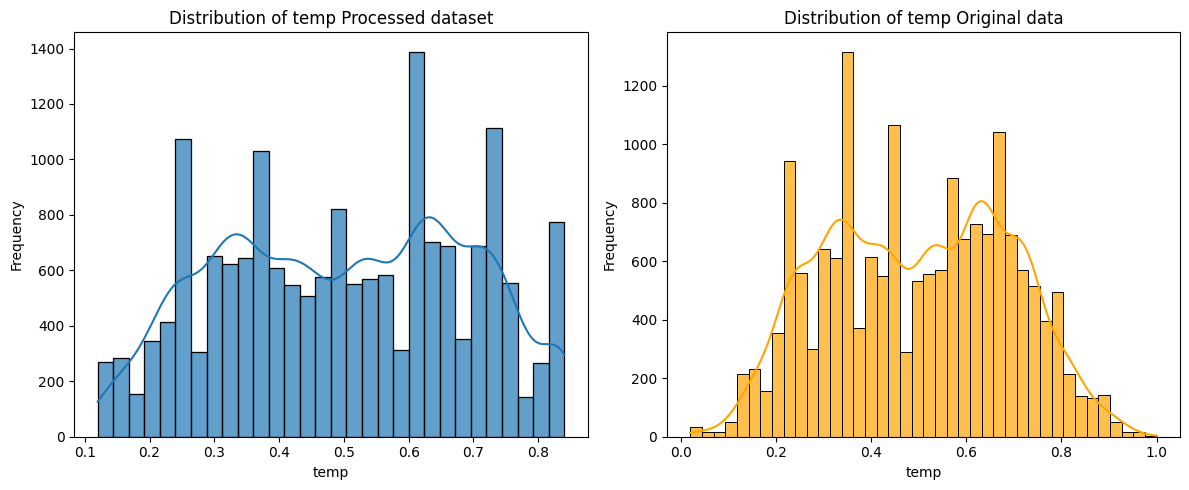

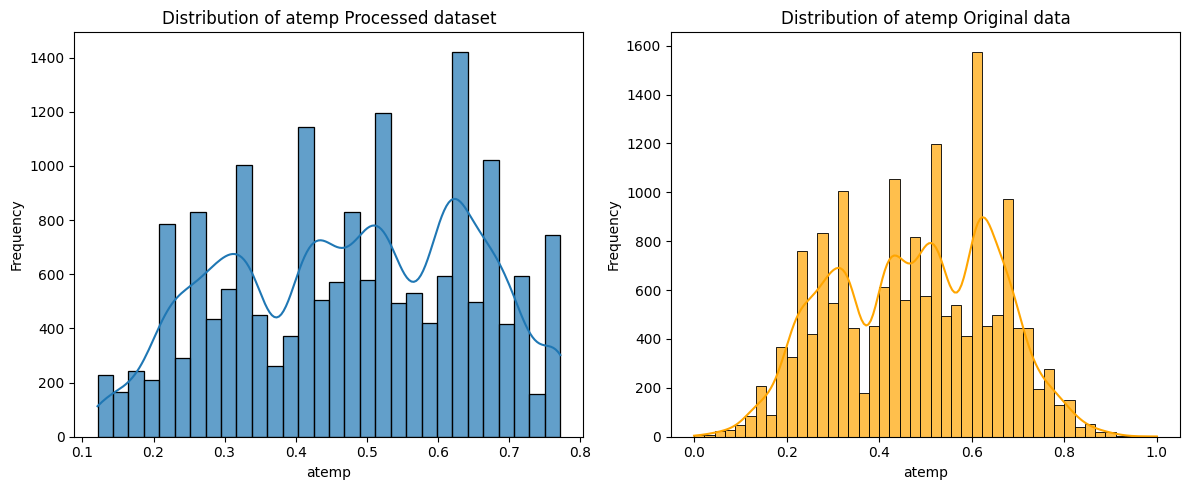

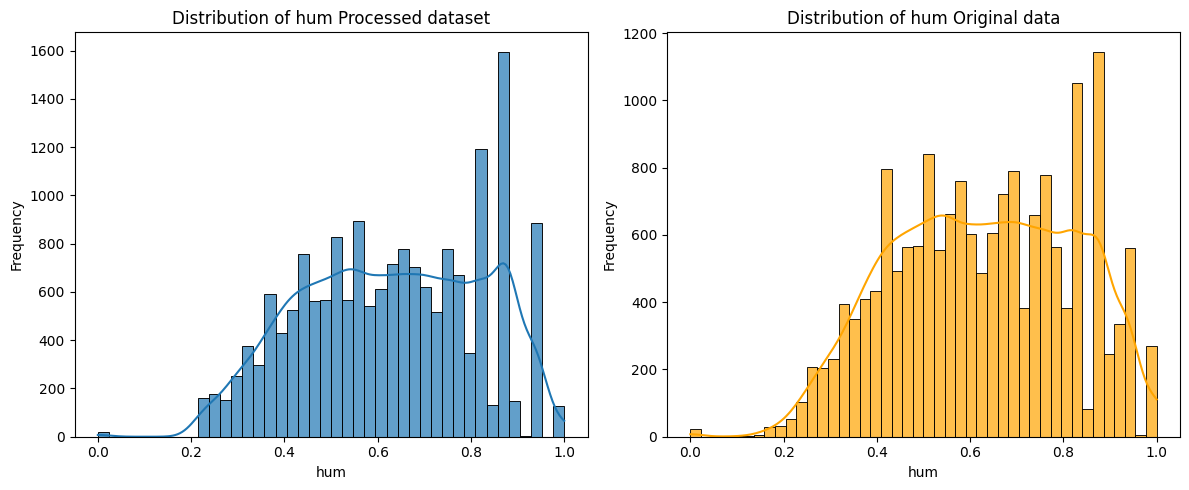

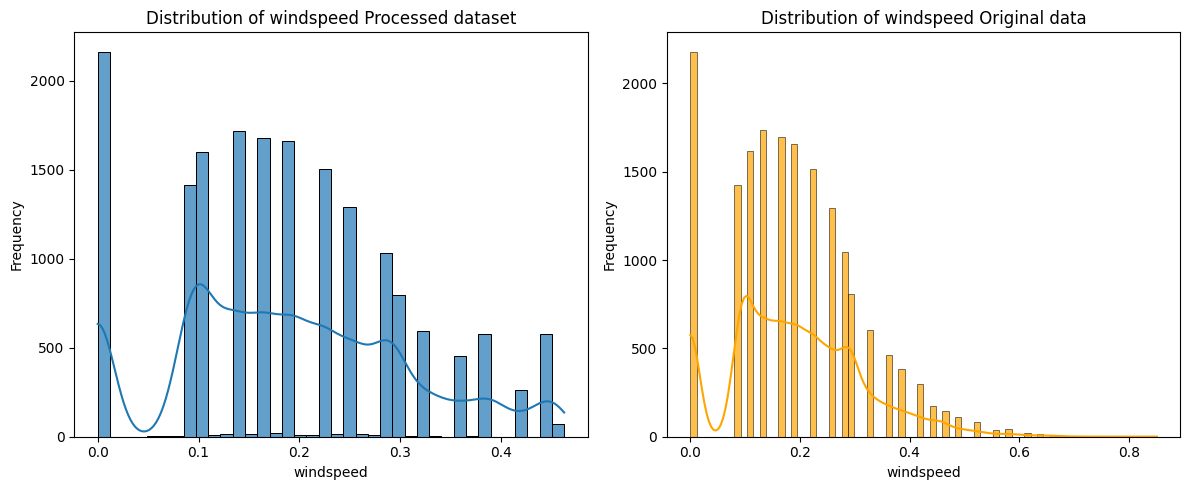

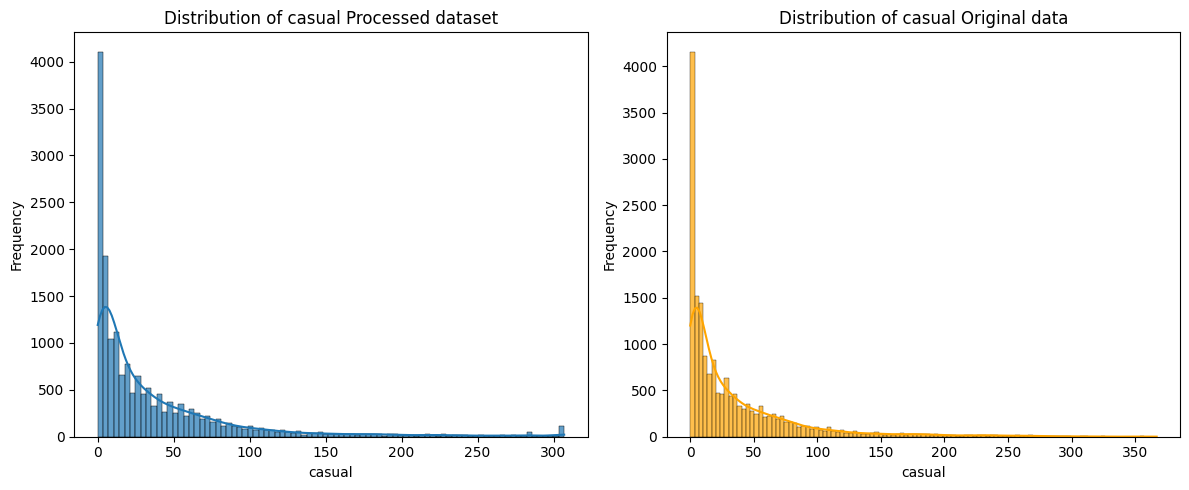

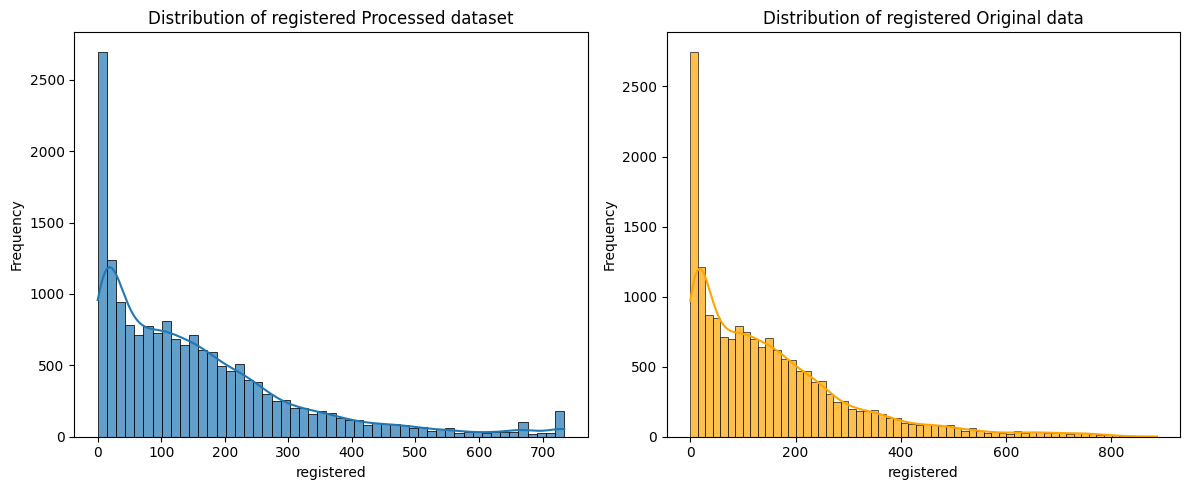

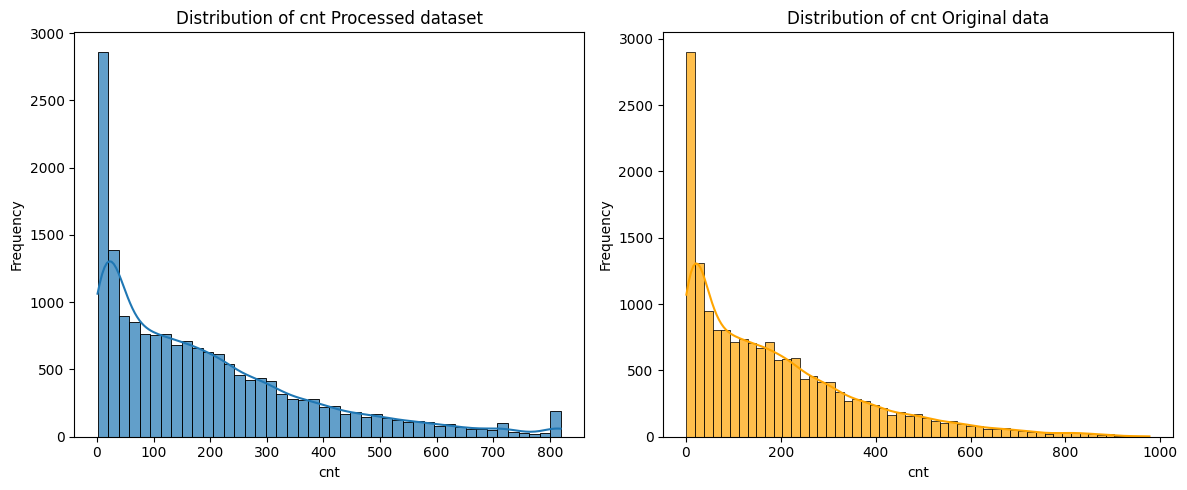

In [66]:
# numeric_cols = df_imputed.select_dtypes(include=['number', 'float']).columns
numeric_cols = ['temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt']
data_original = pd.read_csv('../data/raw/bike_sharing_original.csv')
def plot_distribution_without_outliers(df, column):
    plt.figure(figsize=(12, 5))
    # Create subplots
    plt.subplot(1, 2, 1)
    sns.histplot(df[column], kde=True, alpha=0.7, label='Processed dataset')
    plt.title(f'Distribution of {column} Processed dataset')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.subplot(1, 2, 2)
    sns.histplot(data_original[column], kde=True, alpha=0.7, color='orange', label='Original data')
    plt.title(f'Distribution of {column} Original data')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

for col in numeric_cols:
    plot_distribution_without_outliers(df_imputed, col)

In [67]:
df_imputed.shape[0]-data_original.shape[0]

152

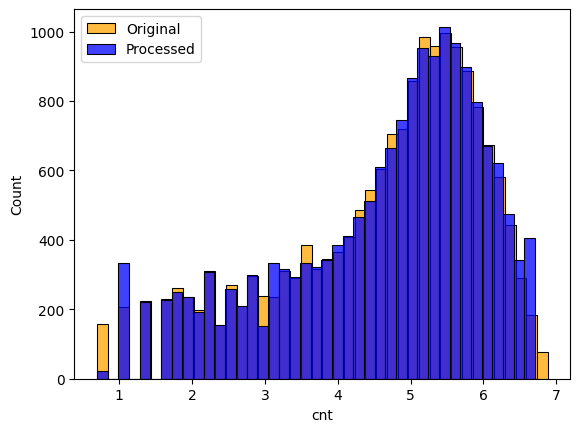

In [68]:
sns.histplot(np.log1p(data_original['cnt']), label='Original', color='orange')
sns.histplot(np.log1p(df_imputed['cnt']), label='Processed', color='blue')
plt.legend()


Tras ajustar el proceso de winsorización al percentil variable por cada columna, se logró conservar la forma original de la distribución de las variables de demanda (casual, registered, cnt), mitigando al mismo tiempo los valores extremos introducidos artificialmente en el dataset modificado.
Como se observa en la comparación visual, el dataset procesado mantiene la asimetría positiva (sesgo a la derecha) característica del comportamiento de los usuarios, lo que asegura que las relaciones subyacentes se mantengan representativas para el modelado posterior.

In [70]:
df_imputed.to_csv('../data/processed/bike_sharing_processed.csv', index=False)